# Project 1: EDA on Retail Sales Data

**Goal:** Explore the retail sales dataset to find useful patterns and insights.

## Step 1: Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print('Libraries imported!')

Libraries imported!


## Step 2: Upload and Load the Dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving retail_sales_dataset.csv to retail_sales_dataset.csv


In [3]:
df = pd.read_csv('retail_sales_dataset.csv')

print('Shape of dataset:', df.shape)
df.head()

Shape of dataset: (1000, 9)


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


## Step 3: Basic Data Checks

In [4]:
# Check column types
print(df.dtypes)

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object


In [5]:
# Check for missing values
print(df.isnull().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [6]:
# Check for duplicate rows
print('Duplicate rows:', df.duplicated().sum())

Duplicate rows: 0


In [7]:
# Fix the Date column so Python understands it as a date
df['Date'] = pd.to_datetime(df['Date'])

# Pull out month and year from the date
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.strftime('%b')
df['Year'] = df['Date'].dt.year
df['Day_of_Week'] = df['Date'].dt.day_name()

print('Date columns created!')
df[['Date', 'Month_Name', 'Year', 'Day_of_Week']].head()

Date columns created!


,Date,Month_Name,Year,Day_of_Week
0,2023-11-24,Nov,2023,Friday
1,2023-02-27,Feb,2023,Monday
2,2023-01-13,Jan,2023,Friday
3,2023-05-21,May,2023,Sunday
4,2023-05-06,May,2023,Saturday


## Step 4: Descriptive Statistics

In [8]:
# Basic stats — mean, median, min, max etc.
df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].describe()

,Age,Quantity,Price per Unit,Total Amount
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,41.39200,2.514000,179.890000,456.000000
std,13.68143,1.132734,189.681356,559.997632
min,18.00000,1.000000,25.000000,25.000000
25%,29.00000,1.000000,30.000000,60.000000
50%,42.00000,3.000000,50.000000,135.000000
75%,53.00000,4.000000,300.000000,900.000000
max,64.00000,4.000000,500.000000,2000.000000


In [9]:
# Key business numbers
print('Total Revenue      :', df['Total Amount'].sum())
print('Total Transactions :', len(df))
print('Unique Customers   :', df['Customer ID'].nunique())
print('Average Order Value:', round(df['Total Amount'].mean(), 2))
print('Highest Purchase   :', df['Total Amount'].max())

Total Revenue      : 456000
Total Transactions : 1000
Unique Customers   : 1000
Average Order Value: 456.0
Highest Purchase   : 2000


## Step 5: Sales Over Time

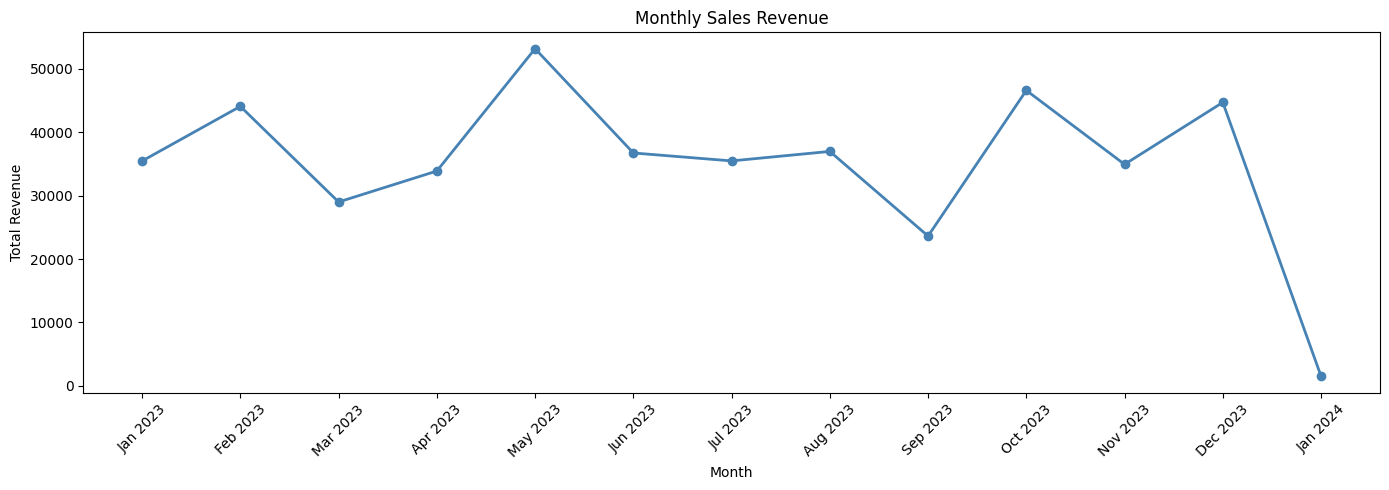

In [10]:
# Total sales per month
monthly = df.groupby(['Year', 'Month', 'Month_Name'])['Total Amount'].sum().reset_index()
monthly = monthly.sort_values(['Year', 'Month'])
monthly['Period'] = monthly['Month_Name'] + ' ' + monthly['Year'].astype(str)

plt.figure(figsize=(14, 5))
plt.plot(monthly['Period'], monthly['Total Amount'], marker='o', color='steelblue', linewidth=2)
plt.xticks(rotation=45)
plt.title('Monthly Sales Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.savefig('monthly_sales.png', dpi=150)
plt.show()

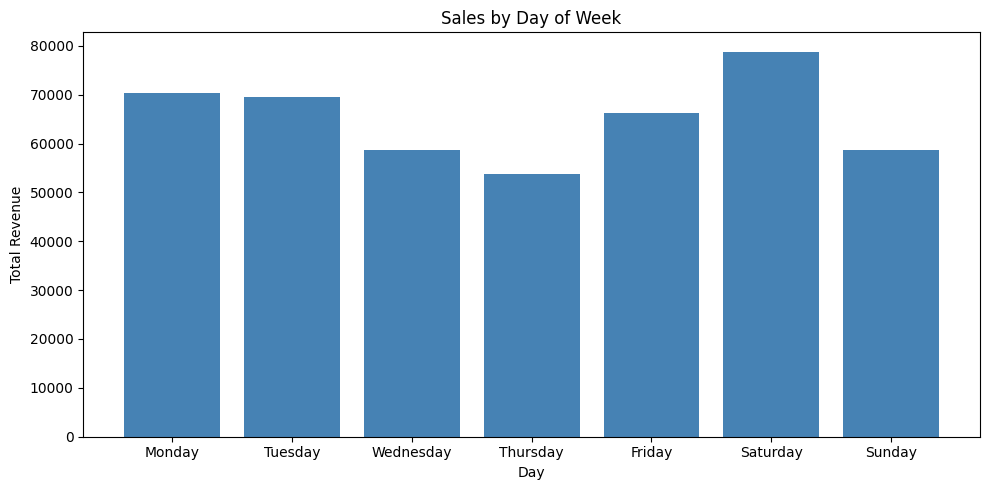

In [11]:
# Sales by day of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_sales = df.groupby('Day_of_Week')['Total Amount'].sum().reindex(day_order)

plt.figure(figsize=(10, 5))
plt.bar(day_sales.index, day_sales.values, color='steelblue')
plt.title('Sales by Day of Week')
plt.xlabel('Day')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.savefig('sales_by_day.png', dpi=150)
plt.show()

## Step 6: Product Category Analysis

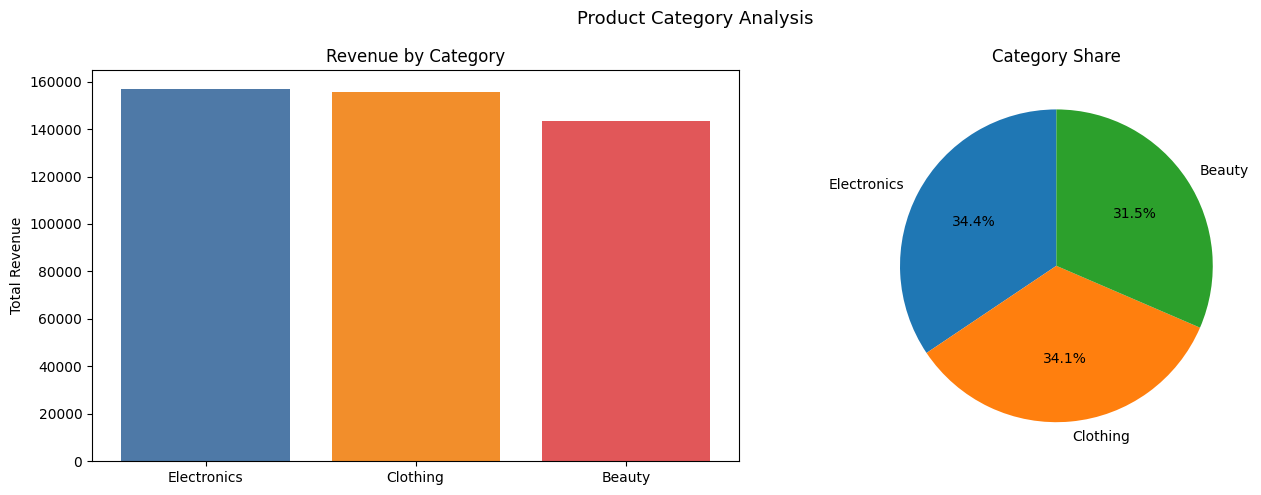

In [12]:
# Revenue per product category
cat_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
axes[0].bar(cat_sales.index, cat_sales.values, color=['#4e79a7', '#f28e2b', '#e15759'])
axes[0].set_title('Revenue by Category')
axes[0].set_ylabel('Total Revenue')

# Pie chart
axes[1].pie(cat_sales.values, labels=cat_sales.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Category Share')

plt.suptitle('Product Category Analysis', fontsize=13)
plt.tight_layout()
plt.savefig('category_analysis.png', dpi=150)
plt.show()

## Step 7: Customer Analysis

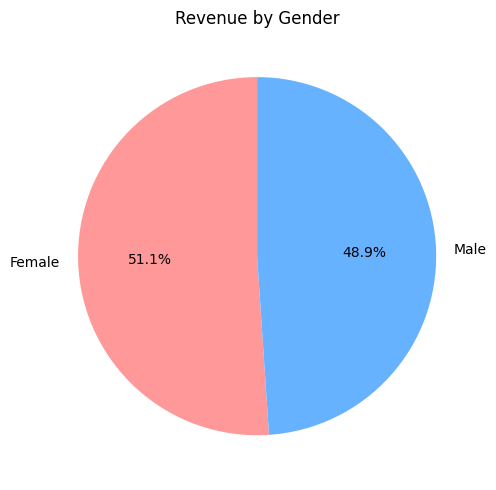

In [13]:
# Revenue by gender
gender_rev = df.groupby('Gender')['Total Amount'].sum()

plt.figure(figsize=(6, 5))
plt.pie(gender_rev, labels=gender_rev.index, autopct='%1.1f%%',
        colors=['#FF9999', '#66B2FF'], startangle=90)
plt.title('Revenue by Gender')
plt.tight_layout()
plt.savefig('gender_revenue.png', dpi=150)
plt.show()

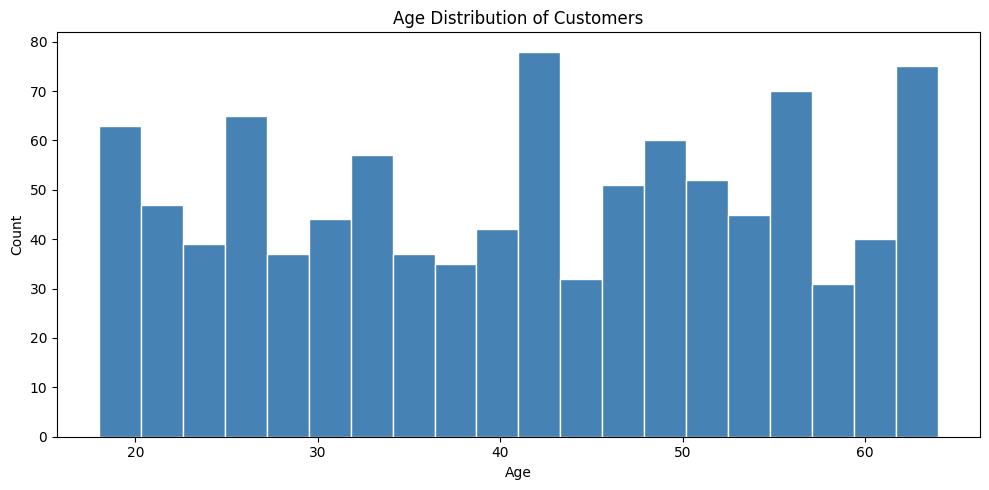

In [14]:
# Age distribution of customers
plt.figure(figsize=(10, 5))
plt.hist(df['Age'], bins=20, color='steelblue', edgecolor='white')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('age_distribution.png', dpi=150)
plt.show()

## Step 8: Correlation Heatmap

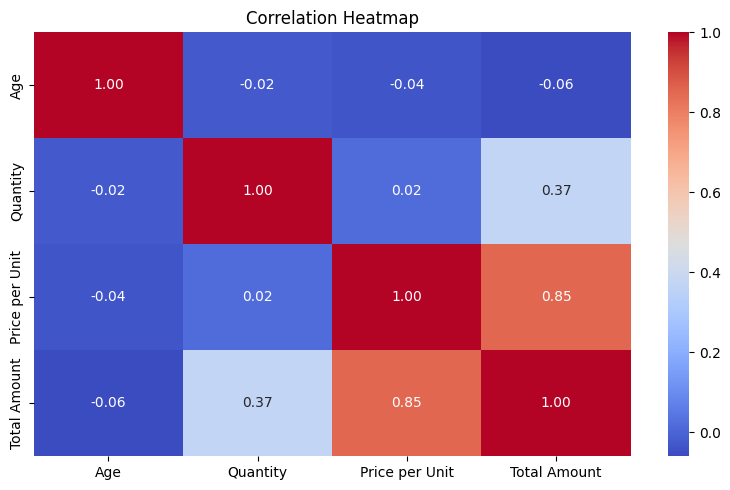

In [15]:
# See how numeric columns relate to each other
corr = df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('heatmap.png', dpi=150)
plt.show()

## Step 9: Key Insights & Recommendations

In [16]:
top_category = cat_sales.idxmax()
top_day = day_sales.idxmax()

print('===== KEY INSIGHTS =====')
print('Top Revenue Category :', top_category)
print('Best Sales Day       :', top_day)
print('Total Revenue        :', df['Total Amount'].sum())
print('Average Order Value  :', round(df['Total Amount'].mean(), 2))

print()
print('===== RECOMMENDATIONS =====')
print('1. Focus promotions on', top_category, '- it drives the most revenue.')
print('2. Run special offers on', top_day, '- it is the busiest sales day.')
print('3. Target slow months with discounts to keep revenue steady.')
print('4. Personalize campaigns based on age group and gender.')

===== KEY INSIGHTS =====
Top Revenue Category : Electronics
Best Sales Day       : Saturday
Total Revenue        : 456000
Average Order Value  : 456.0

===== RECOMMENDATIONS =====
1. Focus promotions on Electronics - it drives the most revenue.
2. Run special offers on Saturday - it is the busiest sales day.
3. Target slow months with discounts to keep revenue steady.
4. Personalize campaigns based on age group and gender.
